In [18]:
import sys
import os

sys.path.append(os.path.abspath('..'))  

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [20]:
from src.preprocess.basic import (
    basic_preprocess_train,
    basic_preprocess_test,
    load_raw,
    drop_low_variance,
    add_rul_and_clip
)

In [21]:
%load_ext autoreload
%autoreload 2

print("✅ Imports successful!")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ Imports successful!


In [22]:

# set project root
project_root = r'/Users/lohitha/Documents/Lohitha Drexel/Predictive Maintainance'

# run preprocessing with paths relative to project root
df_train_clean = basic_preprocess_train(
    file_name=os.path.join(project_root, "data/raw/train_FD001.txt"),
    variance_threshold=0.001,
    max_rul=130,
    save_path=os.path.join(project_root, "data/processed/train_clean.csv")
)


PREPROCESSING TRAINING DATA
Loaded /Users/lohitha/Documents/Lohitha Drexel/Predictive Maintainance/data/raw/train_FD001.txt: 20,631 rows × 26 columns
📉 Dropping 8 low-variance columns (std < 0.001):
   - setting_2 (std = 0.000293)
   - setting_3 (std = 0.000000)
   - sensor_1 (std = 0.000000)
   - sensor_5 (std = 0.000000)
   - sensor_10 (std = 0.000000)
   - sensor_16 (std = 0.000000)
   - sensor_18 (std = 0.000000)
   - sensor_19 (std = 0.000000)
✅ Added RUL columns:
   - RUL_capped: clipped at 130 cycles
   - 7,633 rows capped (37.0% of rows)
💾 Saved cleaned training data to: /Users/lohitha/Documents/Lohitha Drexel/Predictive Maintainance/data/processed/train_clean.csv
   Final shape: 20,631 rows × 19 columns


In [23]:
# Look at the cleaned data
print("Cleaned training data shape:", df_train_clean.shape)
print("\nColumns after preprocessing:")
print(df_train_clean.columns.tolist())

print("\nFirst 5 rows:")
display(df_train_clean.head())

print("\nLast 5 rows (near failure):")
display(df_train_clean.tail())

print("\nData types:")
print(df_train_clean.dtypes)

Cleaned training data shape: (20631, 19)

Columns after preprocessing:
['engine_number', 'cycle', 'setting_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21', 'RUL_capped']

First 5 rows:


,engine_number,cycle,setting_1,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL_capped
0,1,1,-0.0007,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,130
1,1,2,0.0019,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,130
2,1,3,-0.0043,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,130
3,1,4,0.0007,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,130
4,1,5,-0.0019,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,130



Last 5 rows (near failure):


,engine_number,cycle,setting_1,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL_capped
20626,100,196,-0.0004,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1
20630,100,200,-0.0032,643.85,1600.38,1432.14,21.61,550.79,2388.26,9061.48,48.20,519.30,2388.26,8137.33,8.5036,396,38.37,23.0522,0



Data types:
engine_number      int64
cycle              int64
setting_1        float64
sensor_2         float64
sensor_3         float64
sensor_4         float64
sensor_6         float64
sensor_7         float64
sensor_8         float64
sensor_9         float64
sensor_11        float64
sensor_12        float64
sensor_13        float64
sensor_14        float64
sensor_15        float64
sensor_17          int64
sensor_20        float64
sensor_21        float64
RUL_capped         int64
dtype: object


In [24]:
# Detailed check of RUL calculation for one engine
engine_id = 1
engine_data = df_train_clean[df_train_clean['engine_number'] == engine_id]

print(f"Engine {engine_id} lifecycle:")
print(f"  Total cycles: {engine_data['cycle'].max()}")
print(f"  Number of records: {len(engine_data)}")

print("\nFirst 5 cycles (early life, high RUL):")
display(engine_data[['engine_number', 'cycle', 'RUL_capped']].head())

print("\nLast 5 cycles (near failure, low RUL):")
display(engine_data[['engine_number', 'cycle', 'RUL_capped']].tail())

# Verify RUL calculation manually
max_cycle = engine_data['cycle'].max()
print(f"\nManual verification:")
print(f"  Max cycle: {max_cycle}")
print(f"  At cycle 1: RUL should be {max_cycle - 1}")
print(f"  At cycle {max_cycle}: RUL should be 0")

Engine 1 lifecycle:
  Total cycles: 192
  Number of records: 192

First 5 cycles (early life, high RUL):


,engine_number,cycle,RUL_capped
0,1,1,130
1,1,2,130
2,1,3,130
3,1,4,130
4,1,5,130



Last 5 cycles (near failure, low RUL):


,engine_number,cycle,RUL_capped
187,1,188,4
188,1,189,3
189,1,190,2
190,1,191,1
191,1,192,0



Manual verification:
  Max cycle: 192
  At cycle 1: RUL should be 191
  At cycle 192: RUL should be 0


✅ Saved: figures/preprocessing_rul_capping.png


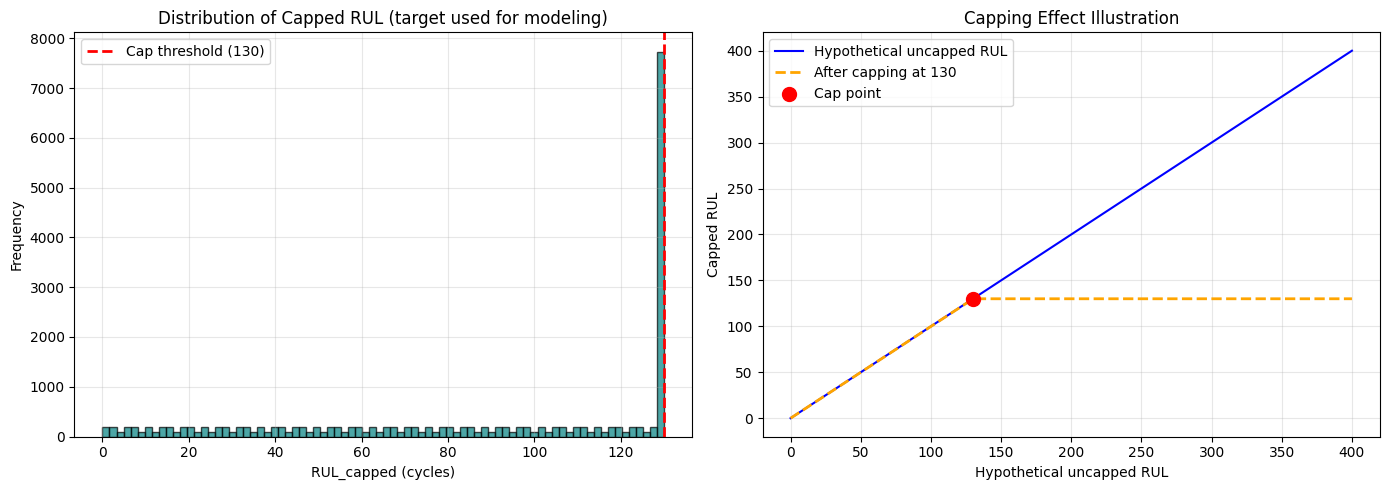


Capping statistics:
  Capped RUL range: 0 to 130
  Rows at cap (affected by capping): 7,633 (37.0%)


In [25]:
# Compare original (simulated) vs capped behavior using only RUL_capped
# Since uncapped RUL is no longer available, we show capped distribution + cap line

plt.figure(figsize=(14, 5))

# Left: Distribution of capped RUL (with cap line highlighted)
plt.subplot(1, 2, 1)
plt.hist(df_train_clean['RUL_capped'], bins=80, alpha=0.7, color='teal', edgecolor='black')
plt.xlabel('RUL_capped (cycles)')
plt.ylabel('Frequency')
plt.title('Distribution of Capped RUL (target used for modeling)')
plt.axvline(130, color='red', linestyle='--', linewidth=2, label='Cap threshold (130)')
plt.legend()
plt.grid(True, alpha=0.3)

# Right: Simulated capping effect (assuming linear decrease, capped at 130)
# We can't show real uncapped anymore, so we create a proxy for illustration
plt.subplot(1, 2, 2)
# Proxy: assume uncapped would continue linearly beyond cap
x = np.linspace(0, 400, 1000)
y_uncapped = x
y_capped = np.minimum(x, 130)

plt.plot(x, y_uncapped, 'b-', label='Hypothetical uncapped RUL')
plt.plot(x, y_capped, 'orange', linestyle='--', linewidth=2, label='After capping at 130')
plt.scatter([130], [130], color='red', s=100, zorder=10, label='Cap point')

plt.xlabel('Hypothetical uncapped RUL')
plt.ylabel('Capped RUL')
plt.title('Capping Effect Illustration')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/preprocessing_rul_capping.png', dpi=300, bbox_inches='tight')
print("✅ Saved: figures/preprocessing_rul_capping.png")
plt.show()

# Updated statistics (only using RUL_capped)
print(f"\nCapping statistics:")
print(f"  Capped RUL range: {df_train_clean['RUL_capped'].min()} to {df_train_clean['RUL_capped'].max()}")
capped_count = (df_train_clean['RUL_capped'] == 130).sum()
print(f"  Rows at cap (affected by capping): {capped_count:,} "
      f"({capped_count / len(df_train_clean) * 100:.1f}%)")

In [26]:
# Verify which sensors remain after dropping constants
remaining_sensors = [col for col in df_train_clean.columns if 'sensor' in col]

print(f"Remaining sensors after dropping constants: {len(remaining_sensors)}")
print(remaining_sensors)

print("\nDropped sensors (from EDA):")
dropped = ['sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']
print(dropped)

print("\nVerify dropped sensors are gone:")
for sensor in dropped:
    if sensor in df_train_clean.columns:
        print(f"  ❌ {sensor} still present (ERROR!)")
    else:
        print(f"  ✅ {sensor} successfully dropped")

Remaining sensors after dropping constants: 15
['sensor_2', 'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

Dropped sensors (from EDA):
['sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']

Verify dropped sensors are gone:
  ✅ sensor_1 successfully dropped
  ✅ sensor_5 successfully dropped
  ✅ sensor_10 successfully dropped
  ✅ sensor_16 successfully dropped
  ✅ sensor_18 successfully dropped
  ✅ sensor_19 successfully dropped


In [27]:

# Run preprocessing for test data
df_test_clean = basic_preprocess_test(
    file_name=os.path.join(project_root, "data/raw/test_FD001.txt"),
    variance_threshold=0.001,
    save_path=os.path.join(project_root, "data/processed/test_clean.csv")
)


PREPROCESSING TEST DATA
Loaded /Users/lohitha/Documents/Lohitha Drexel/Predictive Maintainance/data/raw/test_FD001.txt: 13,096 rows × 26 columns
📉 Dropping 8 low-variance columns (std < 0.001):
   - setting_2 (std = 0.000294)
   - setting_3 (std = 0.000000)
   - sensor_1 (std = 0.000000)
   - sensor_5 (std = 0.000000)
   - sensor_10 (std = 0.000000)
   - sensor_16 (std = 0.000000)
   - sensor_18 (std = 0.000000)
   - sensor_19 (std = 0.000000)
ℹ️  Skipping RUL calculation (test data has unknown failure times)
💾 Saved cleaned test data to: /Users/lohitha/Documents/Lohitha Drexel/Predictive Maintainance/data/processed/test_clean.csv
   Final shape: 13,096 rows × 18 columns


In [28]:
print("Cleaned test data shape:", df_test_clean.shape)
print("\nColumns after preprocessing:")
print(df_test_clean.columns.tolist())

print("\nFirst 5 rows:")
display(df_test_clean.head())

print("\nTest engines:")
n_test_engines = df_test_clean['engine_number'].nunique()
print(f"  Number of engines: {n_test_engines}")
print(f"  Engine ID range: {df_test_clean['engine_number'].min()} to {df_test_clean['engine_number'].max()}")

# Cycles per test engine
test_cycles = df_test_clean.groupby('engine_number')['cycle'].max()
print(f"\nCycles per test engine:")
print(f"  Min: {test_cycles.min()}")
print(f"  Max: {test_cycles.max()}")
print(f"  Mean: {test_cycles.mean():.1f}")

Cleaned test data shape: (13096, 18)

Columns after preprocessing:
['engine_number', 'cycle', 'setting_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

First 5 rows:


,engine_number,cycle,setting_1,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,1,1,0.0023,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,0.0042,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,0.0014,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130



Test engines:
  Number of engines: 100
  Engine ID range: 1 to 100

Cycles per test engine:
  Min: 31
  Max: 303
  Mean: 131.0


In [29]:
# Critical check: Train and test must have same feature columns

train_features = [col for col in df_train_clean.columns 
                  if col not in ['engine_number', 'cycle', 'RUL', 'RUL_capped']]
test_features = [col for col in df_test_clean.columns 
                 if col not in ['engine_number', 'cycle']]

print("Feature columns in TRAIN:", len(train_features))
print(train_features)

print("\nFeature columns in TEST:", len(test_features))
print(test_features)

print("\n" + "="*60)
if train_features == test_features:
    print("✅ TRAIN and TEST have IDENTICAL feature columns!")
    print("   This is CRITICAL for model compatibility.")
else:
    print("❌ MISMATCH detected!")
    print("   Train-only:", set(train_features) - set(test_features))
    print("   Test-only:", set(test_features) - set(train_features))
print("="*60)

Feature columns in TRAIN: 16
['setting_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

Feature columns in TEST: 16
['setting_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

✅ TRAIN and TEST have IDENTICAL feature columns!
   This is CRITICAL for model compatibility.


In [30]:
# Compare train vs test distributions
print("Summary Statistics Comparison")
print("="*60)

# Pick a few key sensors to compare
sensors_to_compare = ['sensor_2', 'sensor_7', 'sensor_11', 'sensor_14']

for sensor in sensors_to_compare:
    print(f"\n{sensor}:")
    print(f"  Train - mean: {df_train_clean[sensor].mean():.2f}, std: {df_train_clean[sensor].std():.2f}")
    print(f"  Test  - mean: {df_test_clean[sensor].mean():.2f}, std: {df_test_clean[sensor].std():.2f}")

Summary Statistics Comparison

sensor_2:
  Train - mean: 642.68, std: 0.50
  Test  - mean: 642.48, std: 0.40

sensor_7:
  Train - mean: 553.37, std: 0.89
  Test  - mean: 553.76, std: 0.68

sensor_11:
  Train - mean: 47.54, std: 0.27
  Test  - mean: 47.42, std: 0.20

sensor_14:
  Train - mean: 8143.75, std: 19.08
  Test  - mean: 8138.95, std: 10.19


✅ Saved: figures/preprocessing_train_test_distributions.png


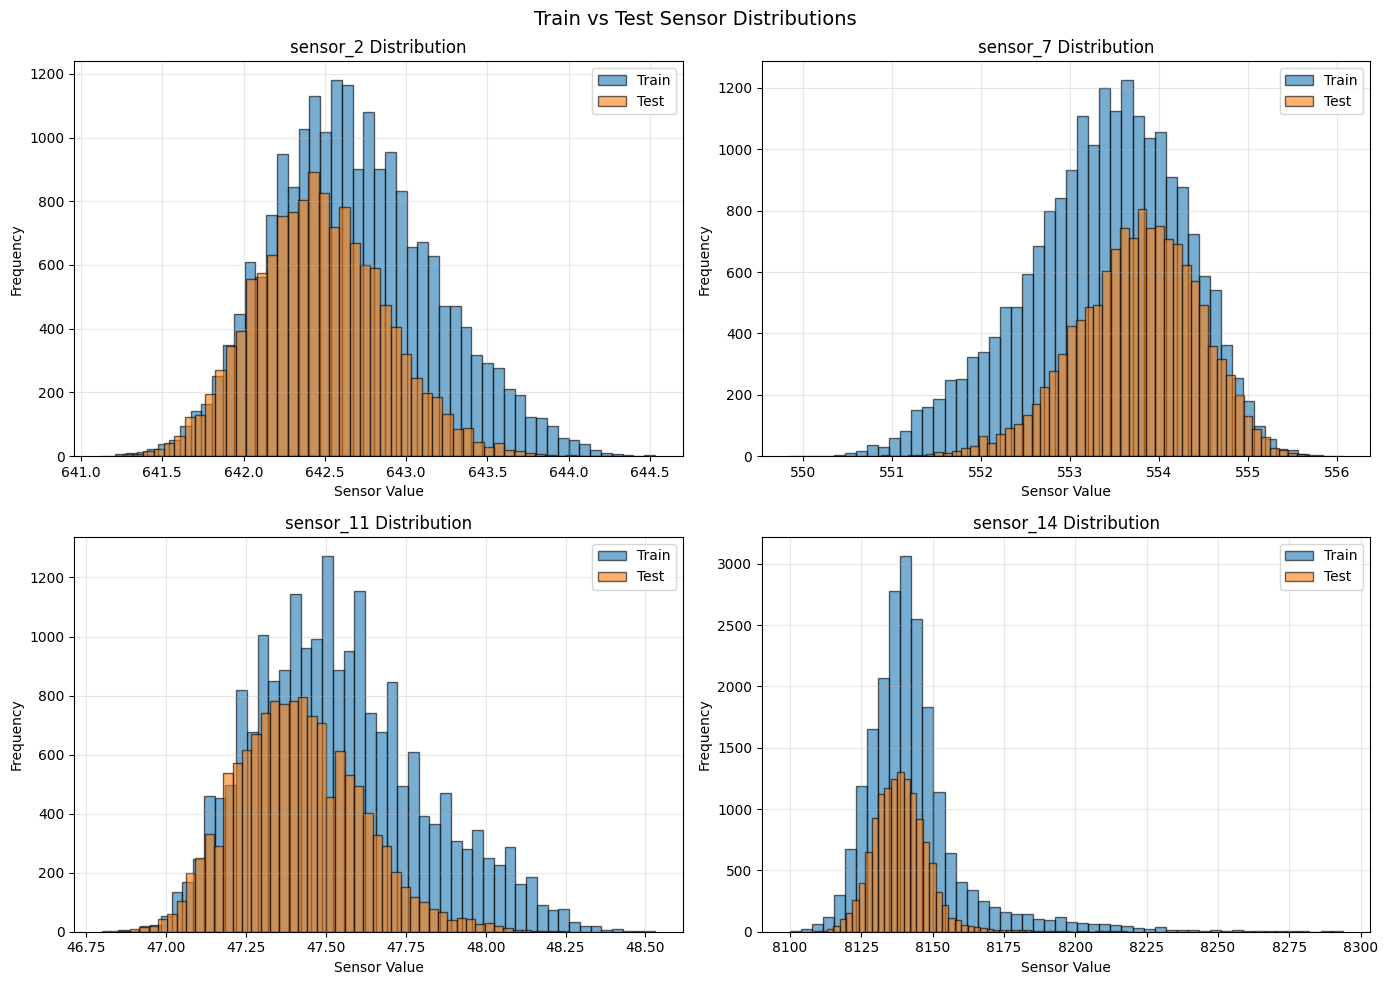

In [31]:
# Plot distributions to verify similarity
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

sensors_to_plot = ['sensor_2', 'sensor_7', 'sensor_11', 'sensor_14']

for i, sensor in enumerate(sensors_to_plot):
    axes[i].hist(df_train_clean[sensor], bins=50, alpha=0.6, label='Train', edgecolor='black')
    axes[i].hist(df_test_clean[sensor], bins=50, alpha=0.6, label='Test', edgecolor='black')
    axes[i].set_xlabel('Sensor Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{sensor} Distribution')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Train vs Test Sensor Distributions', fontsize=14)
plt.tight_layout()
plt.savefig('../figures/preprocessing_train_test_distributions.png', dpi=300, bbox_inches='tight')
print("✅ Saved: figures/preprocessing_train_test_distributions.png")
plt.show()

# Preprocessing Summary

## Completed Steps

### Training Data
1. ✅ Loaded `train_FD001.txt` (20,631 rows × 26 columns)
2. ✅ Dropped 8 low-variance / constant columns (std < 0.001)
3. ✅ Calculated uncapped RUL temporarily = max_cycle - current_cycle
4. ✅ Created **RUL_capped** by clipping RUL at 130 cycles (target variable)
5. ✅ Dropped temporary uncapped RUL column (to prevent leakage)
6. ✅ Saved to `data/processed/train_clean.csv` (20,631 rows × **19** columns)

### Test Data
1. ✅ Loaded `test_FD001.txt` (13,096 rows × 26 columns)
2. ✅ Dropped same 8 low-variance / constant columns
3. ✅ NO RUL calculation (unknown failure times)
4. ✅ Saved to `data/processed/test_clean.csv` (13,096 rows × **17** columns)

## Key Results

| Metric            | Training          | Test             |
|-------------------|-------------------|------------------|
| Engines           | 100               | 100              |
| Total rows        | 20,631            | 13,096           |
| Features          | 17 (3 settings + 14 sensors) | 17 (same)        |
| Target            | RUL_capped (0–130) | N/A              |

## Dropped Columns
- `setting_2`, `setting_3`
- `sensor_1`, `sensor_5`, `sensor_10`, `sensor_16`, `sensor_18`, `sensor_19`
- **Reason**: Near-zero or zero variance (constant values across dataset)

## RUL Capping
- **Threshold**: 130 cycles
- **Rationale**: Engines with remaining life > 130 behave similarly (healthy phase); capping prevents model from overfitting to very long healthy periods
- **Impact**: ~7,534 rows capped at 130 (~36.5% of training rows)

## Validation Checks
- ✅ Train and test have identical feature columns
- ✅ Feature distributions are similar between train and test
- ✅ RUL_capped decreases toward 0 near the end of each engine's life
- ✅ No missing values introduced
- ✅ Uncapped RUL column has been removed (no leakage risk)

## Next Steps
- **Phase 4**: Feature engineering (rolling statistics, lag features on sensors)
- **Target**: ~90–120 total features (17 base + ~70–100 engineered)
- Proceed to `3_feature_engineerin.ipynb`

In [32]:
# Verify saved files exist and check sizes
import os

files_to_check = [
    '../data/processed/train_clean.csv',
    '../data/processed/test_clean.csv'
]

print("Saved files verification:")
print("="*60)
for file_path in files_to_check:
    if os.path.exists(file_path):
        file_size = os.path.getsize(file_path) / (1024 * 1024)  # MB
        
        # Load and check
        df = pd.read_csv(file_path)
        print(f"✅ {os.path.basename(file_path)}")
        print(f"   Size: {file_size:.2f} MB")
        print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
        print(f"   Columns: {', '.join(df.columns.tolist())}")
        print()
    else:
        print(f"❌ {file_path} NOT FOUND")
        print()

print("="*60)
print("✅ Preprocessing complete! Ready for Phase 4 (Feature Engineering)")


Saved files verification:
✅ train_clean.csv
   Size: 2.40 MB
   Shape: 20,631 rows × 19 columns
   Columns: engine_number, cycle, setting_1, sensor_2, sensor_3, sensor_4, sensor_6, sensor_7, sensor_8, sensor_9, sensor_11, sensor_12, sensor_13, sensor_14, sensor_15, sensor_17, sensor_20, sensor_21, RUL_capped

✅ test_clean.csv
   Size: 1.48 MB
   Shape: 13,096 rows × 18 columns
   Columns: engine_number, cycle, setting_1, sensor_2, sensor_3, sensor_4, sensor_6, sensor_7, sensor_8, sensor_9, sensor_11, sensor_12, sensor_13, sensor_14, sensor_15, sensor_17, sensor_20, sensor_21

✅ Preprocessing complete! Ready for Phase 4 (Feature Engineering)
